# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

# Task 1

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.index.freq='MS'
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

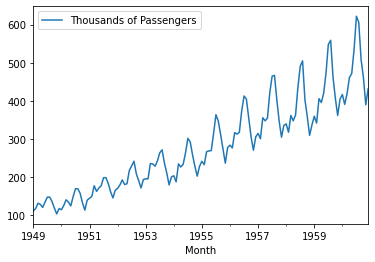

In [4]:
df.plot()

In [5]:
seasonalDecomposition=seasonal_decompose(df,model='mul')

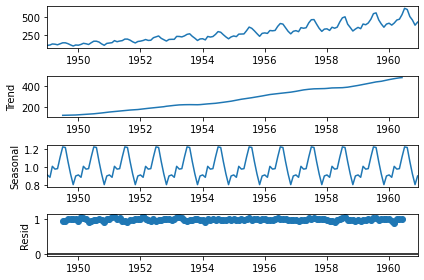

In [6]:
seasonalDecomposition.plot();

In [7]:
auto_arima(df,seasonal=True,m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.81 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.16 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.48 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.18 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.46 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.21 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.40 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.40 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.78 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.06 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.05 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sun, 12 Jun 2022   AIC                           1017.847
Time:                                     18:05:06   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.602      0.000      -1.057      -0.907
sigma2       129.3150     14.557      8.883      0.000     100.784     157.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
train=df.iloc[:-12]
test=df.iloc[-12:]

In [9]:
model = SARIMAX(train, order=(2,1,1), seasonal_order=(0,1,0,12))#,enforce_invertibility=False, enforce_Stationarity=False)
results=model.fit()

/Users/mateuszbulanda-gorol/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mateuszbulanda-gorol/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -447.483
Date:                             Sun, 12 Jun 2022   AIC                            902.967
Time:                                     18:05:07   BIC                            914.083
Sample:                                 01-01-1949   HQIC                           907.481
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5253      0.929     -0.566      0.572      -2.345       1.295
ar.L2          0.0110      0.275      0.040      0.968      -0.529       0.551
ma.L1          0.3064      0.935      0.328      0.743      -1.527       2.140
sigma2       108.0093     13.498      8.002      0.000      81.553     134.466
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.97   Prob(JB):                         0.50
Heteroskedasticity (H):               1.47   Skew:                            -0.09
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
start=len(train)
end=start+len(test)-1
predictions=results.predict(start=start,end=end,dynamic=False).rename('SARIMA')

<AxesSubplot:xlabel='Month'>

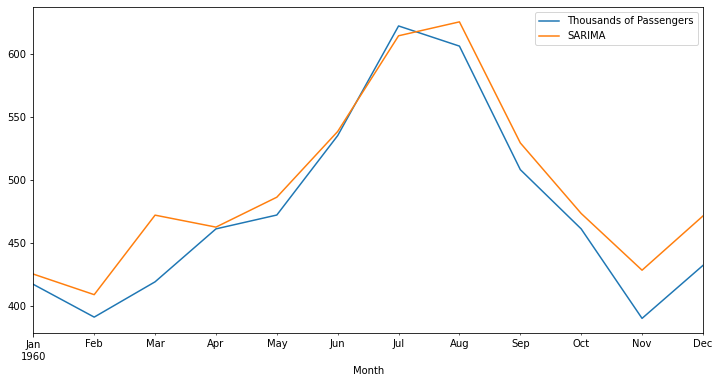

In [12]:
ax=test.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

In [14]:
mean_absolute_percentage_error(test,predictions)

0.044317548784737405

Text(0.5, 0, '')

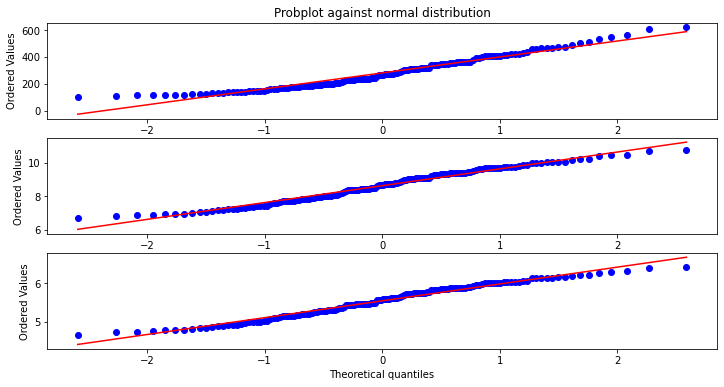

In [15]:
x=df['Thousands of Passengers']
xt, lambda_mle=stats.boxcox(x)
x_log=np.log(x)
fig, (ax1,ax2,ax3)=plt.subplots(3,figsize=(12,6))
stats.probplot(x,dist=stats.norm,plot=ax1);
stats.probplot(xt,dist=stats.norm,plot=ax2);
stats.probplot(x_log,dist=stats.norm,plot=ax3);
ax1.set_title('Probplot against normal distribution')
ax2.set_title('')
ax3.set_title('')
ax1.set_xlabel('')

# Task 2

## Reading data

In [16]:
df = pd.read_csv('co2_mm_mlo.csv')
df

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00


In [17]:
df.insert(0,'date',pd.to_datetime(df[['year', 'month']].assign(DAY=1)))
#df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df

,date,year,month,decimal_date,average,interpolated
0,1958-03-01,1958,3,1958.208,315.71,315.71
1,1958-04-01,1958,4,1958.292,317.45,317.45
2,1958-05-01,1958,5,1958.375,317.50,317.50
3,1958-06-01,1958,6,1958.458,NaN,317.10
4,1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...,...
724,2018-07-01,2018,7,2018.542,408.71,408.71
725,2018-08-01,2018,8,2018.625,406.99,406.99
726,2018-09-01,2018,9,2018.708,405.51,405.51
727,2018-10-01,2018,10,2018.792,406.00,406.00


In [18]:
df = df.set_index('date')
df.index.freq='MS'
df

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


<AxesSubplot:xlabel='date'>

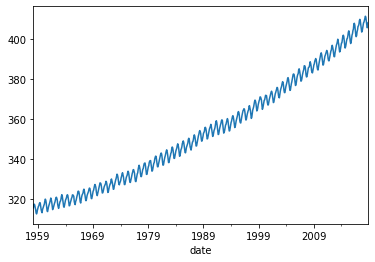

In [19]:
df['interpolated'].plot()

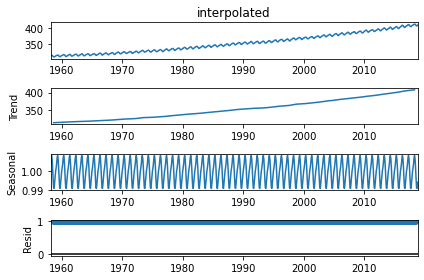

In [20]:
seasonalDecomposition = seasonal_decompose(df['interpolated'], model='mul')
seasonalDecomposition.plot();

## Finding the best SARIMA model

In [21]:
n = 12
trainlen = len(df) - n
train = df.iloc[:trainlen]['interpolated']
test = df.iloc[trainlen:]['interpolated']
start = len(train)
stop = len(df)-1

In [22]:
auto_arima(train, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=435.590, Time=2.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2328.858, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1585.165, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2334.236, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=762.687, Time=2.12 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=478.143, Time=5.69 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=505.593, Time=5.70 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1415.629, Time=0.66 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=4.41 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=594.334, Time=4.87 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=6.07 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=429.589, Time=2.17 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=14

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.882
Date:                            Sun, 12 Jun 2022   AIC                            415.764
Time:                                    18:09:59   BIC                            443.206
Sample:                                         0   HQIC                           426.361
                                            - 717                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3498      0.066      5.295      0.000       0.220       0.479
ar.L2          0.0841      0.020      4.189      0.000       0.045       0.123
ma.L1         -0.7037      0.054    -13.054      0.000      -0.809      -0.598
ar.S.L12       0.9996      0.000   2833.281      0.000       0.999       1.000
ma.S.L12      -0.8666      0.023    -38.300      0.000      -0.911      -0.822
sigma2         0.0952      0.005     20.452      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.74
Prob(Q):                              0.79   Prob(JB):                         0.09
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/mateuszbulanda-gorol/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='date'>

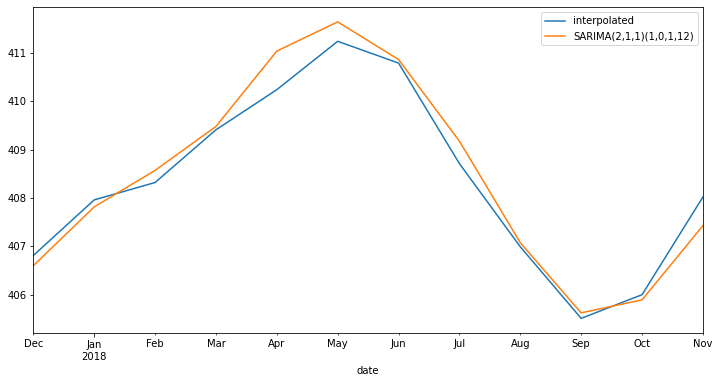

In [23]:
model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,0,1,12))
results=model.fit()
predictions=results.predict(start=start, end=stop, dynamic=False).rename('SARIMA(2,1,1)(1,0,1,12)')
ax=test.plot(legend=True, figsize=(12,6))
predictions.plot(legend=True)

In [24]:
mean_absolute_percentage_error(test, predictions)

0.0006747321543329224

### It looks so good

#  Forecasting into the future

In [25]:
df

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


<AxesSubplot:xlabel='date'>

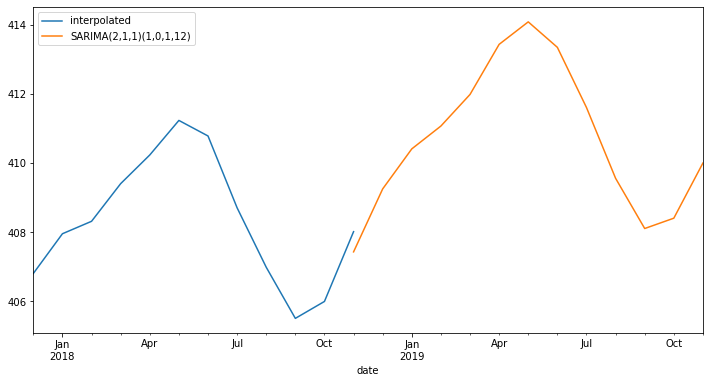

In [26]:
forecastModel = SARIMAX(df['interpolated'], order=(2,1,1), seasonal_order=(1,0,1,12))
forecastResults=forecastModel.fit()
forecastPredictions=forecastResults.predict(start=stop, end=stop+12, dynamic=False).rename('SARIMA(2,1,1)(1,0,1,12)')
ax=test.plot(legend=True, figsize=(12,6))
forecastPredictions.plot(legend=True)

<AxesSubplot:xlabel='date'>

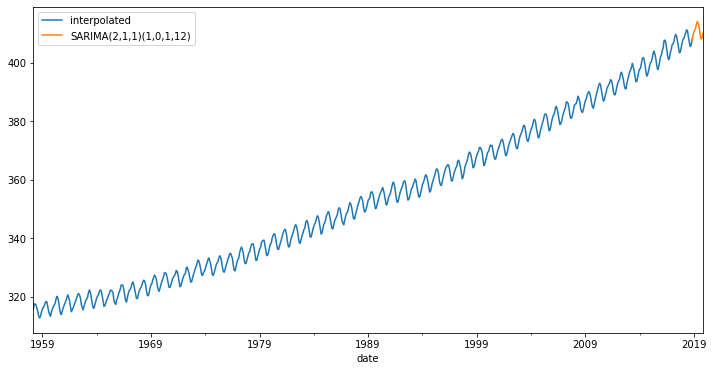

In [27]:
ax = df['interpolated'].plot(legend=True, figsize=(12,6))
forecastPredictions.plot(ax=ax,legend=True)